<a href="https://colab.research.google.com/github/ilmechaJu/Machine_Learning/blob/main/ch_09_%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes, load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [100]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [101]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015454292297363281 (+/-0.0008654383454496946)
avg score time: 0.002197742462158203 (+/-0.0005401023794740401)
avg test score: 0.96 (+/-0.024944382578492935)


In [102]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std())) 

avg fit time: 0.021038818359375 (+/-0.003348741493607066)
avg score time: 0.008204793930053711 (+/-0.0016188248094906375)
avg test score: 0.9533333333333334 (+/-0.016329931618554516)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002102041244506836 (+/-0.001942548826016803)
avg score time: 0.0022643566131591796 (+/-0.0002387211596188479)
avg test score: 0.9493650793650794 (+/-0.037910929811115976)


In [10]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018332672119140626 (+/-0.0011412829614514007)
avg score time: 0.007720804214477539 (+/-0.00017774482284268342)
avg test score: 0.9665079365079364 (+/-0.020746948644437477)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002682065963745117 (+/-0.0006968530532409132)
avg score time: 0.007209634780883789 (+/-0.00011929905372835838)
avg test score: 0.9648501785437045 (+/-0.009609970350036127)


In [13]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.021843481063842773 (+/-0.004319006403072281)
avg score time: 0.015331840515136719 (+/-0.0005738780782603334)
avg test score: 0.9631113181183046 (+/-0.010182126546418261)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
  StandardScaler(),
  SVC()    
)

bagging_model= BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0023673534393310546 (+/-0.0010079662350912528)
avg score time: 0.0006865501403808594 (+/-0.00020678782139242334)
avg test score: 0.9666666666666666 (+/-0.02108185106778919)


In [16]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.026006269454956054 (+/-0.003841964012392232)
avg score time: 0.003047609329223633 (+/-6.92213516860298e-05)
avg test score: 0.9400000000000001 (+/-0.03265986323710903)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
  StandardScaler(),
  SVC()    
)

bagging_model= BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0032166004180908202 (+/-0.0013651223639749126)
avg score time: 0.000792551040649414 (+/-0.0002948101174681194)
avg test score: 0.9833333333333334 (+/-0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.027349233627319336 (+/-0.0017352849171751142)
avg score time: 0.0035094738006591795 (+/-0.0001701833354086702)
avg test score: 0.9665079365079364 (+/-0.032368500562618134)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
  StandardScaler(),
  SVC()    
)

bagging_model= BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0062849998474121095 (+/-0.0006780539785734537)
avg score time: 0.0017276763916015624 (+/-0.0004571113955944818)
avg test score: 0.9736376339077782 (+/-0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.039933300018310545 (+/-0.0067205009206069526)
avg score time: 0.008345937728881836 (+/-0.0021254490013046146)
avg test score: 0.9648812296227295 (+/-0.018370630301114587)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0022882938385009764 (+/-0.0004965657574574356)
avg score time: 0.0006443977355957032 (+/-4.0883718738212956e-05)
avg test score: 0.9600000000000002 (+/-0.03265986323710903)


In [25]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022784423828125 (+/-0.0015997959739415802)
avg score time: 0.002395009994506836 (+/-5.154047237486097e-05)
avg test score: 0.9466666666666667 (+/-0.039999999999999994)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0020551681518554688 (+/-0.0005720789493271636)
avg score time: 0.0005475521087646484 (+/-0.00019681066541601012)
avg test score: 0.8709523809523809 (+/-0.05700512501657816)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028501081466674804 (+/-0.005997510744989737)
avg score time: 0.0029019832611083983 (+/-0.0005685588286391888)
avg test score: 0.95 (+/-0.04444444444444447)


##### 유방암 데이터

In [97]:
base_model = make_pipeline(
  StandardScaler(),
  DecisionTreeClassifier()    
)

bagging_model= BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [98]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008175420761108398 (+/-0.0005316556705193972)
avg score time: 0.0006069183349609375 (+/-3.393881564640775e-05)
avg test score: 0.9208663251047973 (+/-0.016939679883668988)


In [99]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03665518760681152 (+/-0.0019451578223351246)
avg score time: 0.0029852867126464845 (+/-0.0005216480694892694)
avg test score: 0.9525694767893184 (+/-0.02964390262970661)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [74]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [75]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017971992492675781 (+/-0.0007561746589330431)
avg score time: 0.0019388198852539062 (+/-0.000547688505074843)
avg test score: 0.47357748833823543 (+/-0.13243123464477455)


In [76]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01899409294128418 (+/-0.0034512234719858096)
avg score time: 0.009600591659545899 (+/-0.0005623961738402965)
avg test score: 0.4238786945810834 (+/-0.0834581474769143)


##### 당뇨병 데이터

In [80]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [81]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024821281433105467 (+/-0.002645724736918176)
avg score time: 0.0017985820770263672 (+/-0.0002351824190318971)
avg test score: 0.3689720650295623 (+/-0.044659049060165365)


In [82]:
cross_val = cross_validate( #bagging 써서 향상됨..!
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02130880355834961 (+/-0.005002014774721243)
avg score time: 0.010331296920776367 (+/-0.0015710694951101716)
avg test score: 0.4061805685056137 (+/-0.048558225202279794)


#### SVR

##### 보스턴 주택 가격 데이터
(보스턴, 당뇨병에 SVR 결과 안좋음)

In [62]:
base_model = make_pipeline(
    StandardScaler(),
    SVR() #'알고리즘'을 SVR로 바꿔보자
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [63]:
corss_val = cross_validate(
    estimator = base_model, #base
    X=boston.data, y=boston.target, #boston
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20391273498535156 (+/-0.00661641329705438)
avg score time: 0.009616708755493164 (+/-0.0006622388992845938)
avg test score: 0.9596180717279925 (+/-0.021880018954181506)


In [64]:
corss_val = cross_validate(
    estimator = bagging_model, #bagging - 결과 더 안좋음(*boston에는 SVR이 부적합.)
    X=diabetes.data, y=diabetes.target,#여기도 boston
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20391273498535156 (+/-0.00661641329705438)
avg score time: 0.009616708755493164 (+/-0.0006622388992845938)
avg test score: 0.9596180717279925 (+/-0.021880018954181506)


##### 당뇨병 데이터

In [65]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [66]:
corss_val = cross_validate(
    estimator = base_model, #base
    X=diabetes.data, y=diabetes.target, #diabetes
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20391273498535156 (+/-0.00661641329705438)
avg score time: 0.009616708755493164 (+/-0.0006622388992845938)
avg test score: 0.9596180717279925 (+/-0.021880018954181506)


In [67]:
corss_val = cross_validate(
    estimator = bagging_model, #bagging
    X=diabetes.data, y=diabetes.target, #diabetes
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20391273498535156 (+/-0.00661641329705438)
avg score time: 0.009616708755493164 (+/-0.0006622388992845938)
avg test score: 0.9596180717279925 (+/-0.021880018954181506)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [86]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [87]:
corss_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target, 
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02130880355834961 (+/-0.005002014774721243)
avg score time: 0.010331296920776367 (+/-0.0015710694951101716)
avg test score: 0.4061805685056137 (+/-0.048558225202279794)


In [88]:
corss_val = cross_validate(
    estimator = bagging_model, #bagging
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02130880355834961 (+/-0.005002014774721243)
avg score time: 0.010331296920776367 (+/-0.0015710694951101716)
avg test score: 0.4061805685056137 (+/-0.048558225202279794)


##### 당뇨병 데이터

In [92]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [95]:
corss_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target, 
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02130880355834961 (+/-0.005002014774721243)
avg score time: 0.010331296920776367 (+/-0.0015710694951101716)
avg test score: 0.4061805685056137 (+/-0.048558225202279794)


In [96]:
corss_val = cross_validate(
    estimator = bagging_model, #bagging
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02130880355834961 (+/-0.005002014774721243)
avg score time: 0.010331296920776367 (+/-0.0015710694951101716)
avg test score: 0.4061805685056137 (+/-0.048558225202279794)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [50]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [51]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.1366419315338135 (+/-0.004444832052912779)
avg score time:0.008192634582519532 (+/-0.00021416049430700244)
avg test score:0.96 (+/-0.024944382578492935)


In [52]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.1407686710357666 (+/-0.006772984736933523)
avg score time:0.010123395919799804 (+/-0.0038987884793279183)
avg test score:0.9609523809523809 (+/-0.02214499050996228)


In [53]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.20391273498535156 (+/-0.00661641329705438)
avg score time:0.009616708755493164 (+/-0.0006622388992845938)
avg test score:0.9596180717279925 (+/-0.021880018954181506)


### Random Forests 회귀

In [47]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [48]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.31574501991271975 (+/-0.00532064867815191)
avg score time:0.009161758422851562 (+/-0.0022692416007804115)
avg test score:0.6153601022605881 (+/-0.21358321837153774)


In [49]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.26609134674072266 (+/-0.0065024868821858366)
avg score time:0.008600807189941407 (+/-0.00030400919713719686)
avg test score:0.4136325334329086 (+/-0.04230170785595998)


### Extremely Randomized Trees 분류

In [41]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [44]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.09621176719665528 (+/-0.0028838591067917047)
avg score time:0.00845193862915039 (+/-0.0004028056880707311)
avg test score:0.9533333333333334 (+/-0.03399346342395189)


In [45]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.10849041938781738 (+/-0.011152119064681271)
avg score time:0.011184215545654297 (+/-0.0041857206919612075)
avg test score:0.9831746031746033 (+/-0.02230370548603213)


In [46]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.12097558975219727 (+/-0.003821416982055241)
avg score time:0.009998083114624023 (+/-0.0006464432656884933)
avg test score:0.9648657040832169 (+/-0.014650680934301616)


### Extremely Randomized Trees 회귀

In [110]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [111]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.19039745330810548 (+/-0.0069229930999150854)
avg score time:0.008252191543579101 (+/-0.00017341069478540413)
avg test score:0.6164345991866039 (+/-0.2718797948432684)


In [112]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.16476702690124512 (+/-0.004547649596023099)
avg score time:0.00887923240661621 (+/-0.0009374687096586588)
avg test score:0.43673113297598565 (+/-0.04614146762268285)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [116]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [117]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [118]:
#31:27초
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

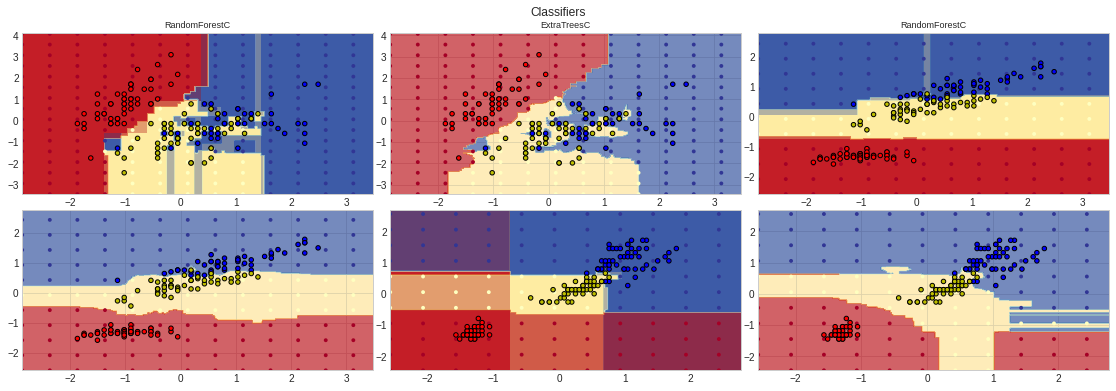

In [119]:
plt.figure(figsize=(16, 8))

for pair in ([0,1], [0,2], [2,3]):
  
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classfier")]
    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) ###
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

      xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                           np.arange(y_min, y_max, plot_step_coarser))
      Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                             yy_coarser.ravel()]).reshape(xx_coarser.shape)
      cs_point = plt.scatter(xx_coarser, yy_coarser, s=15,
                             c=Z_points_coarser, cmap=cmap,
                             edgecolor='none')                       
      
      plt.scatter(X[:, 0], X[:, 1], c=y,
                  cmap=ListedColormap(['r','y','b']),
                  edgecolor='k', s=20)
      plot_idx +=1

plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [120]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

<function matplotlib.pyplot.show>

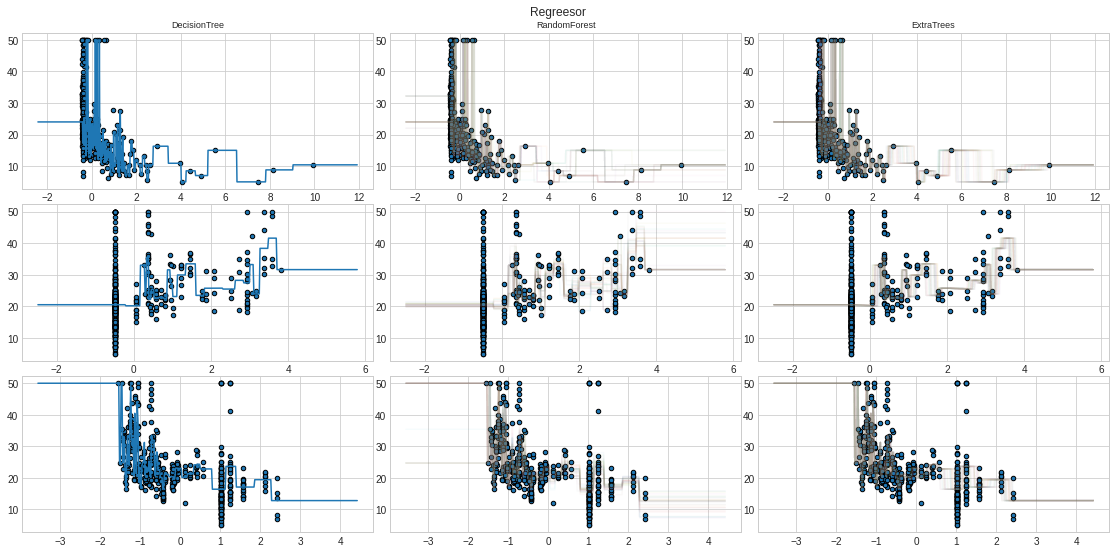

In [123]:
plt.figure(figsize=(16,8))

for pair in (0, 1, 2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) /std

    model.fit(X.reshape(-1, 1), y)
    
    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx +=1

plt.suptitle("Regreesor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [125]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [126]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.0691725730895996 (+/-0.0029776087749546244)
avg score time:0.006925058364868164 (+/-0.0004520465904880687)
avg test score:0.9466666666666667 (+/-0.03399346342395189)


In [127]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.09280037879943848 (+/-0.010017927300289184)
avg score time:0.009116172790527344 (+/-0.002776210346640985)
avg test score:0.8085714285714285 (+/-0.16822356718459935)


In [128]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.1853868007659912 (+/-0.005786292541940913)
avg score time:0.01086888313293457 (+/-0.0038433022108585956)
avg test score:0.9701133364384411 (+/-0.019709915473893072)


### AdaBoost 회귀

In [129]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [130]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.09615054130554199 (+/-0.0026393803984564993)
avg score time:0.005058765411376953 (+/-0.0010243282049989056)
avg test score:0.5985744583807469 (+/-0.20937548598257683)


In [131]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.086024808883667 (+/-0.016285728475058114)
avg score time:0.003885793685913086 (+/-0.0005449631131175608)
avg test score:0.41312084500745616 (+/-0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [135]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [136]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.20945148468017577 (+/-0.017435983996729996)
avg score time:0.0012115478515625 (+/-6.838642855888554e-05)
avg test score:0.9666666666666668 (+/-0.02108185106778919)


In [137]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.2402106761932373 (+/-0.005359599094983856)
avg score time:0.0010843276977539062 (+/-8.145950286349494e-05)
avg test score:0.9274603174603175 (+/-0.04123502805167926)


In [138]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.43073253631591796 (+/-0.004714836331301527)
avg score time:0.0009917736053466797 (+/-6.515668759703627e-05)
avg test score:0.9596180717279925 (+/-0.02453263202329889)


### Gradient Tree Boosting 회귀

In [139]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [140]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.12316980361938476 (+/-0.003224772186989114)
avg score time:0.000960397720336914 (+/-2.308601081258813e-06)
avg test score:0.6753284094030726 (+/-0.1586478804655432)


In [141]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.09675073623657227 (+/-0.0029566332501972476)
avg score time:0.001152372360229492 (+/-3.140203493537855e-05)
avg test score:0.40664918716681164 (+/-0.06985263151362481)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [142]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [143]:
model1 = SVC() #hard 방식
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [150]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.95 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.98 (+/- 0.02) [KNeighborsClassifier]
Accuracy: 0.98 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [VotingClassifier]


In [151]:
model1 = SVC(probability=True) #soft 방식
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights=[2,1,2]
)

In [154]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [187]:
#1:08:10
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [188]:
X = iris.data[:, [0, 2]]
y = iris.target

In [189]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft', weights=[2,1,2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [162]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

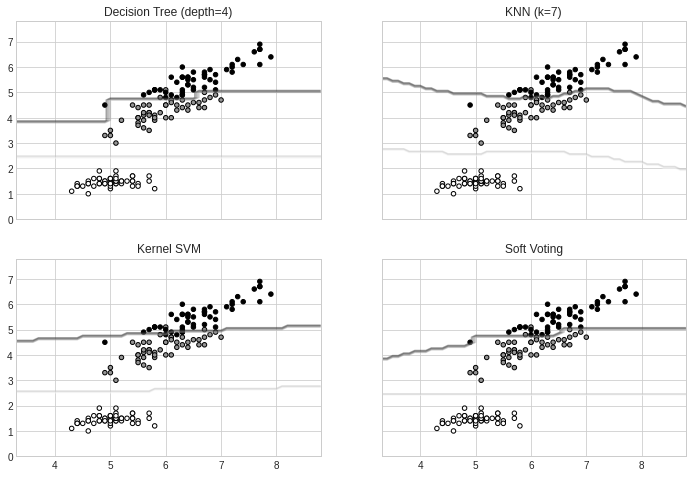

In [166]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)', 
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contour(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [169]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

In [171]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.23) [RandomForestRegressor]
R2: 0.65 (+/- 0.21) [VotingRegressor]


### 회귀식 시각화

In [192]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [193]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [194]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

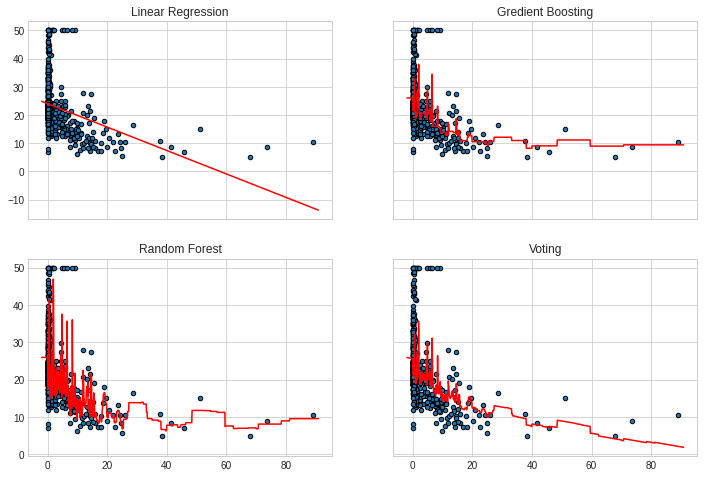

In [195]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gredient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [197]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor

In [198]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [199]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [200]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.36981959342956544 (+/-0.013062256569200594)
avg score time:0.008905172348022461 (+/-0.0002084417157939192)
avg test score:0.46079721012843466 (+/-0.05007269347082079)


#### 회귀식 시각화

In [201]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [202]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

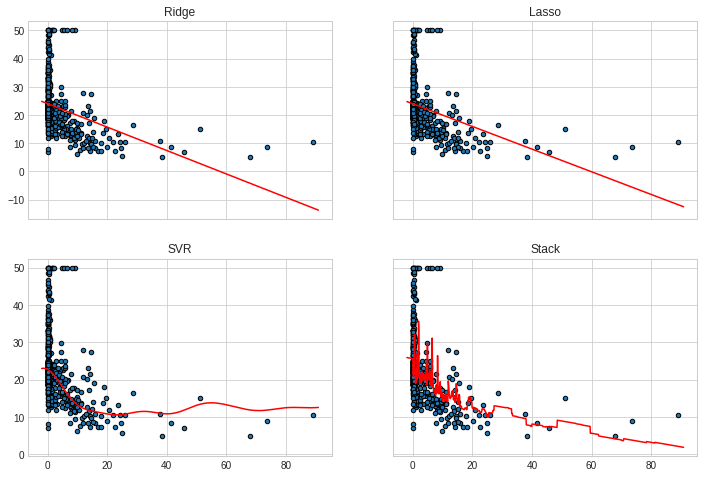

In [203]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [217]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [218]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator=RandomForestClassifier()
)

In [219]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time:{} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time:{} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score:{} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time:0.3265228271484375 (+/-0.015957326658180945)
avg score time:0.010795068740844727 (+/-0.0025808897388305487)
avg test score:0.9733333333333334 (+/-0.02494438257849294)


#### 결정 경계 시각화

In [220]:
X = iris.data[:, [0, 2]]
y = iris.target

In [221]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
  estimators=estimators,
  final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [222]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

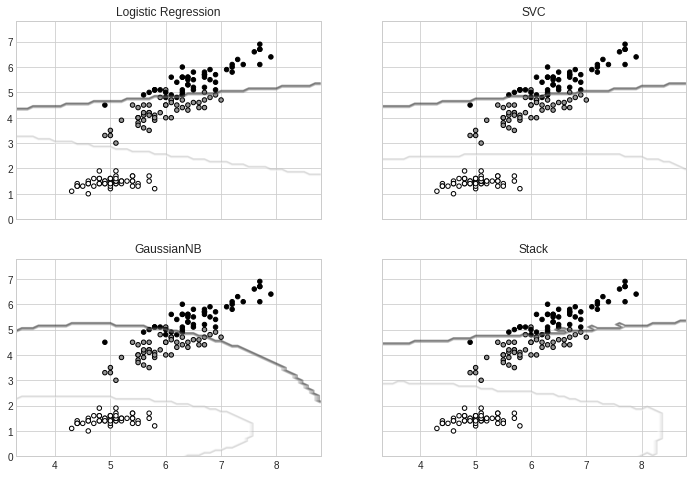

In [224]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', 
                           'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contour(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()